In [1]:
import operator as op
import random
random.seed(123)

import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import sklearn.metrics as skm

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/others/carprices.csv
/kaggle/input/others/canada_per_capita.csv
/kaggle/input/others/Movie_classification.csv
/kaggle/input/others/hiring.csv
/kaggle/input/others/house-votes-84.csv
/kaggle/input/others/xrayfull.csv
/kaggle/input/others/insurance_data.csv
/kaggle/input/others/daily-min-temperatures.csv
/kaggle/input/others/nih_labels.csv
/kaggle/input/others/Customer.csv
/kaggle/input/others/us-airlines-monthly-aircraft-miles-flown.csv
/kaggle/input/others/MBA_ADMISSIONS.csv
/kaggle/input/others/salaries.csv
/kaggle/input/others/Movie_regression.xls
/kaggle/input/others/House_Price.csv
/kaggle/input/others/shampoo.csv
/kaggle/input/others/daily-total-female-births-CA.csv


In [2]:
# Loading the data
df = pd.read_csv('/kaggle/input/others/MBA_ADMISSIONS.csv')
df.head()

,pre_score,Age_in_years,Percentage_in_10_Class,Percentage_in_12_Class,Percentage_in_Under_Graduate,percentage_MBA,post_score,Gender,STATE,Previous_Degree,Marital_status,Place_you_belong_to,perceived#Job#Skill,Specialization
0,75.000000,22,71.0,74.8,72.00,61.00,83.333333,Male,Central Zone,Engineering,Single,Urban,prefered skills,Marketing
1,71.666667,25,77.6,82.6,76.90,66.85,76.666667,Male,Central Zone,Engineering,Single,Semi Urban,prefered skills,LOS
2,76.666667,26,93.2,83.8,77.00,74.97,75.000000,Female,Central Zone,Engineering,Single,Urban,desired skills,Finance
3,66.666667,22,91.2,80.0,67.00,68.30,60.000000,Male,Central Zone,Commerce,Single,Semi Urban,prefered skills,Finance
4,71.666667,24,79.8,61.6,60.33,69.28,76.666667,Female,Central Zone,Engineering,Single,Urban,prefered skills,Finance


In [3]:
# Encoding 
cat_vars = ['Gender','STATE', 'Previous_Degree','Marital_status',
            'Place_you_belong_to', 'perceived#Job#Skill', 'Specialization']
for i in cat_vars:
    df[i+"_cat"] = df[i].astype('category').cat.codes
df.head()

,pre_score,Age_in_years,Percentage_in_10_Class,Percentage_in_12_Class,Percentage_in_Under_Graduate,percentage_MBA,post_score,Gender,STATE,Previous_Degree,...,Place_you_belong_to,perceived#Job#Skill,Specialization,Gender_cat,STATE_cat,Previous_Degree_cat,Marital_status_cat,Place_you_belong_to_cat,perceived#Job#Skill_cat,Specialization_cat
0,75.000000,22,71.0,74.8,72.00,61.00,83.333333,Male,Central Zone,Engineering,...,Urban,prefered skills,Marketing,1,0,2,1,2,1,3
1,71.666667,25,77.6,82.6,76.90,66.85,76.666667,Male,Central Zone,Engineering,...,Semi Urban,prefered skills,LOS,1,0,2,1,1,1,2
2,76.666667,26,93.2,83.8,77.00,74.97,75.000000,Female,Central Zone,Engineering,...,Urban,desired skills,Finance,0,0,2,1,2,0,0
3,66.666667,22,91.2,80.0,67.00,68.30,60.000000,Male,Central Zone,Commerce,...,Semi Urban,prefered skills,Finance,1,0,1,1,1,1,0
4,71.666667,24,79.8,61.6,60.33,69.28,76.666667,Female,Central Zone,Engineering,...,Urban,prefered skills,Finance,0,0,2,1,2,1,0


# Exploratory Data Analysis

## 1. What's the correlation between all of our variables?

<AxesSubplot:>

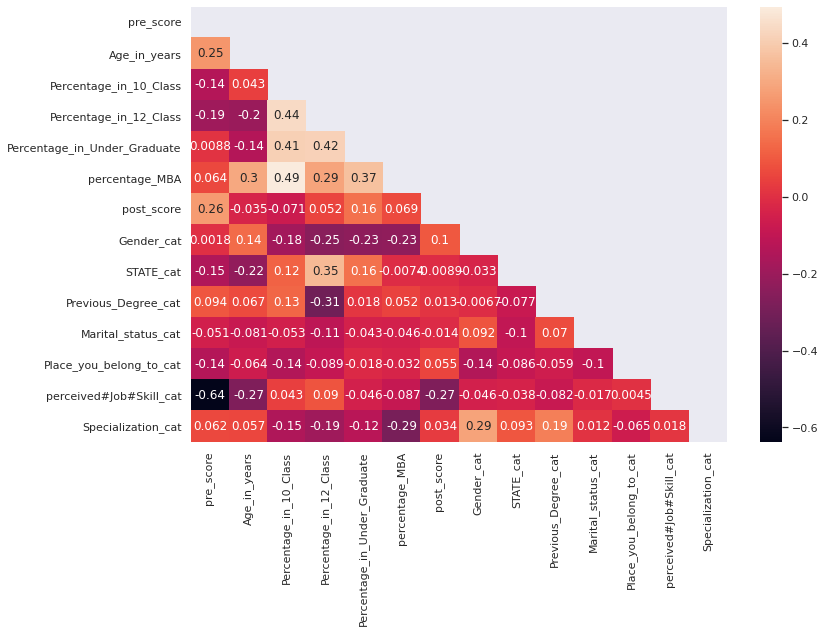

In [4]:
# Masking to show only one side of the matrix
corr = np.corrcoef(df.corr())                        
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Axtual Correlation matrix as a heatmap
sns.heatmap(df.corr(), annot=True, mask=mask)

## 2. What are the demographics of this  MBA class?

<AxesSubplot:xlabel='Age_in_years', ylabel='Count'>

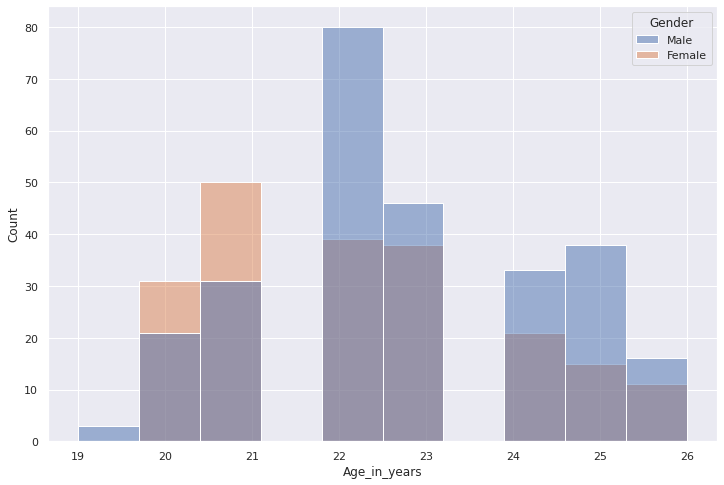

In [5]:
#Distribution of the target variable
sns.histplot(data=df, x='Age_in_years', hue='Gender')

## 3. How do men and women differ in their MBA performance?

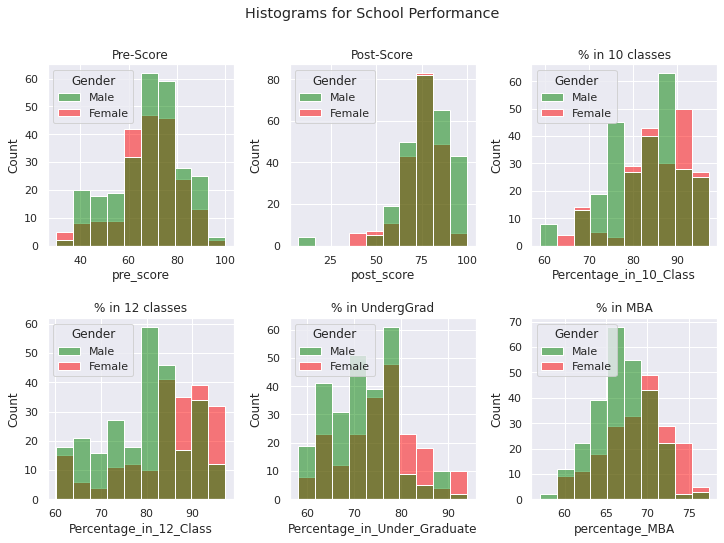

In [6]:
# Distribution of all independent variables by Gender
fig = plt.figure()
gs = fig.add_gridspec(2, 3, hspace=0.4, wspace=0.3)
(ax1, ax2, ax3), (ax4, ax5, ax6) = gs.subplots(sharex=False, sharey=False)
fig.suptitle('Histograms for School Performance')

sns.histplot(ax= ax1, data=df, x ='pre_score', hue='Gender', 
             bins=10, palette=["green", "red"], stat='count')
ax1.set_title("Pre-Score")

sns.histplot(ax= ax2, data=df, x ='post_score', hue='Gender',  
             bins=10, palette=["green", "red"], stat='count')
ax2.set_title("Post-Score")

sns.histplot(ax= ax3, data=df, x ='Percentage_in_10_Class', hue='Gender',  
             bins=10, palette=["green", "red"], stat='count')
ax3.set_title("% in 10 classes")

sns.histplot(ax= ax4, data=df, x ='Percentage_in_12_Class', hue='Gender', 
             bins=10, palette=["green", "red"], stat='count')
ax4.set_title("% in 12 classes")

sns.histplot(ax= ax5, data=df, x ='Percentage_in_Under_Graduate', hue='Gender',  
             bins=10, palette=["green", "red"], stat='count')
ax5.set_title("% in UndergGrad")

sns.histplot(ax= ax6, data=df, x ='percentage_MBA', hue='Gender',  
             bins=10, palette=["green", "red"], stat='count')
ax6.set_title("% in MBA")


plt.show()

## 4. Does undergrad grades predict future performance in MBA?

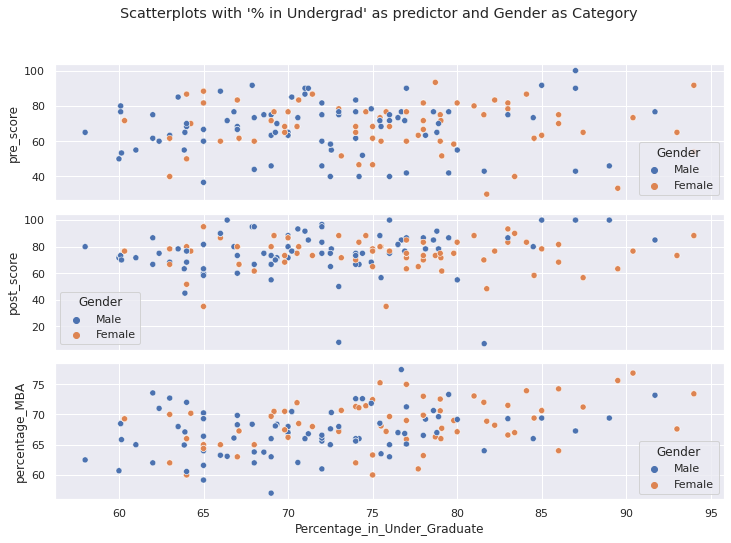

In [7]:
# Scatterplots between % in Undergrad in key performance metrics by Genders
fig = plt.figure()
gs = fig.add_gridspec(3, 1, hspace=0.1, wspace=0.4)
(ax1), (ax2), (ax3) = gs.subplots(sharex=True, sharey=False)
fig.suptitle("Scatterplots with '% in Undergrad' as predictor and Gender as Category")
sns.scatterplot(ax=ax1, data=df, x='Percentage_in_Under_Graduate', y='pre_score', hue='Gender')

sns.scatterplot(ax=ax2, data=df, x='Percentage_in_Under_Graduate', y='post_score', hue='Gender')

sns.scatterplot(ax=ax3, data=df, x='Percentage_in_Under_Graduate', y='percentage_MBA', hue='Gender')

plt.show()

## 5. Does maturity, denoted by age, impact performance in MBA?

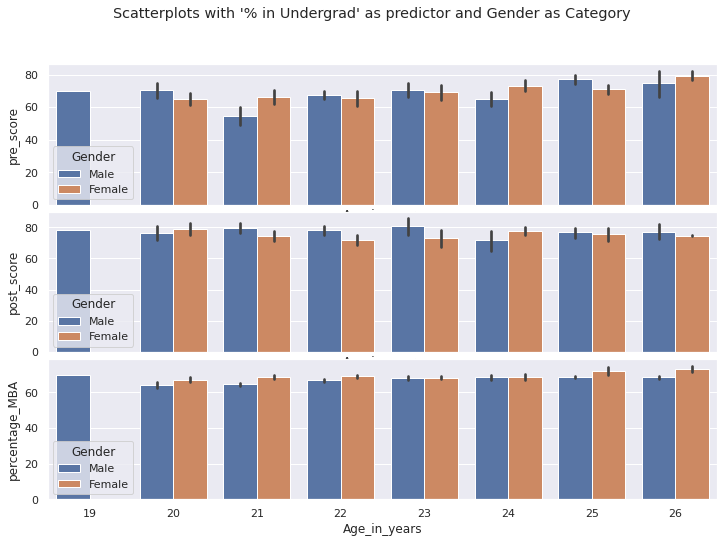

In [8]:
# Barplots by Ages
fig = plt.figure()
gs = fig.add_gridspec(3, 1, hspace=0.05, wspace=0.4)
(ax1), (ax2), (ax3) = gs.subplots(sharex=True, sharey=False)
fig.suptitle("Scatterplots with '% in Undergrad' as predictor and Gender as Category")
sns.barplot(ax=ax1, data=df, x='Age_in_years', y='pre_score', hue='Gender')

sns.barplot(ax=ax2, data=df, x='Age_in_years', y='post_score', hue='Gender')

sns.barplot(ax=ax3, data=df, x='Age_in_years', y='percentage_MBA', hue='Gender')

plt.show()

## 6. How does MBA performance differ by marital status and location?

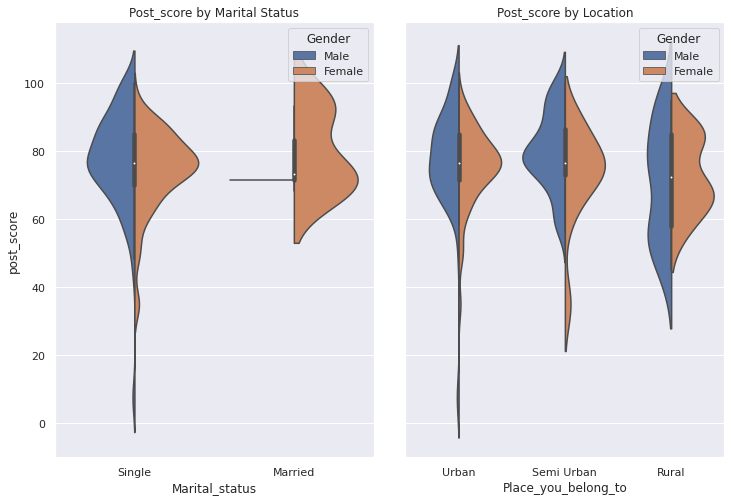

In [9]:
# Barplots by Ages
fig = plt.figure()
gs = fig.add_gridspec(1, 2, hspace=0.4, wspace=0.1)
(ax1, ax2) = gs.subplots(sharex=False, sharey=True)

sns.violinplot(ax=ax1, data=df, x='Marital_status', y='post_score', 
               order=['Single', 'Married'], hue='Gender', split=True)
ax1.set_title("Post_score by Marital Status")

sns.violinplot(ax=ax2, data=df, x='Place_you_belong_to',y='post_score', 
               order=['Urban', 'Semi Urban', 'Rural'], hue='Gender', split=True)
ax2.set_title("Post_score by Location")
for ax in fig.get_axes():
    ax.label_outer()
plt.show()

## 7. Does a more technical undergrad background ensure MBA success?

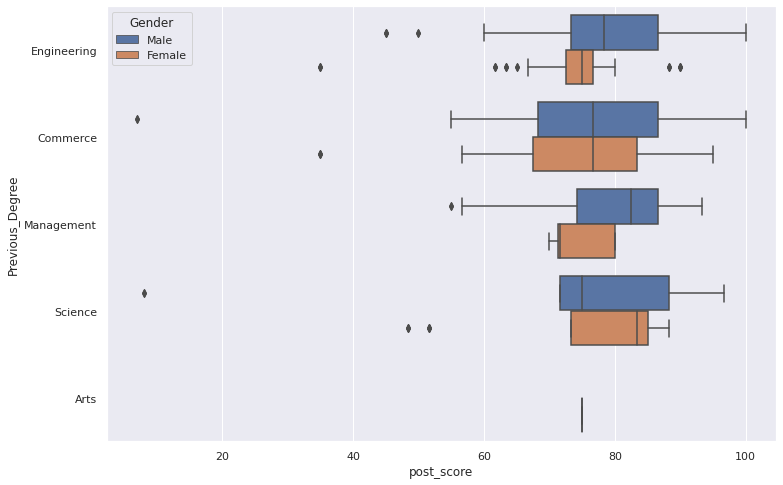

In [10]:
sns.boxplot(data=df, x="post_score", y="Previous_Degree", hue='Gender')
plt.show()

# Model Building & Evaluation

In [11]:
# Models for all categorical variables
class clf_models():
    def __init__(self, iters=None):
        self.iters = iters
        
    def fit(self, X_train, Y_train, X_test, Y_test):
        self.X_train = X_train
        self.Y_train = Y_train
        self.X_test = X_test
        self.Y_test = Y_test

    def predict_knn(self):
    
        # Using Kbest to build kNN
        kbest = self.elbow_method(self.iters)
        model_knn = KNeighborsClassifier(n_neighbors=kbest)
        model_knn.fit(self.X_train, self.Y_train)
        pred_knn = model_knn.predict(self.X_test)
        
        return pred_knn
    
    def predict_nb(self):
        # Naive Bayes
        model_nb = GaussianNB()
        model_nb.fit(self.X_train, self.Y_train)
        pred_nb = model_nb.predict(self.X_test)
    
        return pred_nb
    
    def accuracy(self, Y_pred):
        return skm.accuracy_score(self.Y_test, Y_pred)
    
    def elbow_method(self, iters):
        # Elbow Method to find k-best
        # May rewrite it using a while loop and a margin
        errors = {}    
        for i in range(1, iters):
            model_i = KNeighborsClassifier(n_neighbors=i)
            model_i.fit(self.X_train, self.Y_train)
            pred_i = model_i.predict(self.X_test)
            errors[i] = np.mean(pred_i != self.Y_test)
        return min(errors.items(), key=op.itemgetter(1))[0]
    

In [12]:
# Visualizing for the binary categories
def visualize(ax, var, Y_test, pred_knn, pred_NB):
    # Benchmark for prediction of only 1s (only men)
    bm_pred = [0 for _ in range(len(Y_test))]
    bm_auc  = roc_auc_score(Y_test, bm_pred)
    bm_fpr, bm_tpr, _ = roc_curve(Y_test, bm_pred)

    knn_auc = roc_auc_score(Y_test, pred_knn)
    NB_auc = roc_auc_score(Y_test, pred_NB)
    knn_fpr, knn_tpr, _ = roc_curve(Y_test, pred_knn)
    NB_fpr, NB_tpr, _ = roc_curve(Y_test, pred_NB)
    
    ax.plot(bm_fpr, bm_tpr, linestyle='--', label='Benchmark')
    ax.plot(NB_fpr, NB_tpr, marker='.', label='Naive Bayes')
    ax.plot(knn_fpr, knn_tpr, marker='.', label='kNN')
    text = ': BM =%.2f, K-NN =%.2f, Naive Bayes =%.2f'
    ax.set_title(var+text % (bm_auc,knn_auc, NB_auc))
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    for ax in fig.get_axes():
        ax.label_outer()

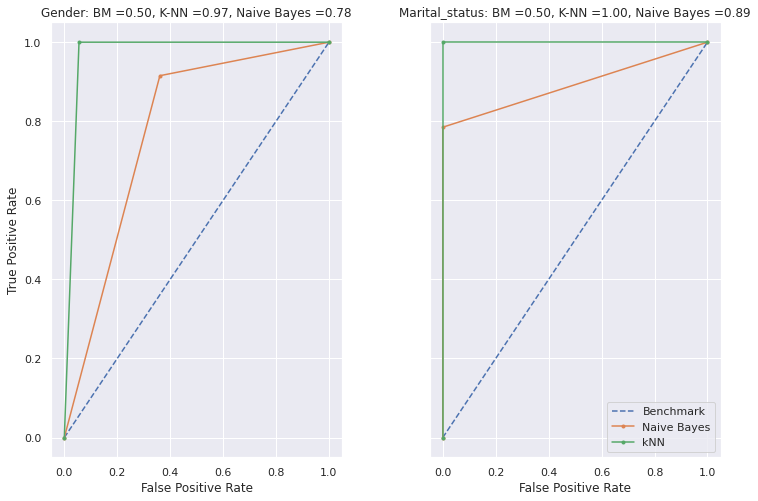

                accuracy_knn  accuracy_nb
Gender                0.9789       0.8105
Marital_status        1.0000       0.7895


In [13]:
if __name__ == "__main__":
    
    targets = ['Gender_cat', 'Marital_status_cat']
    scores = {}
    
    vars, Y_tests, preds_knn, preds_nb = [], [], [], []
    
    fig = plt.figure()
    gs = fig.add_gridspec(1, 2, hspace=0.5, wspace=0.3)
    (ax1, ax2) = gs.subplots(sharex='all', sharey='all')
    
    for t in targets:
        X = df.drop(cat_vars+[t], axis=1).values
        Y = df[t].values

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                            test_size = 0.2, 
                                                            random_state = 0)

        model_knn = clf_models(iters=10)
        model_knn.fit(X_train, Y_train, X_test, Y_test)
        pred_knn = model_knn.predict_knn()
        knn_acc = model_knn.accuracy(pred_knn)
        
        model_nb = clf_models(iters=None)
        model_nb.fit(X_train, Y_train, X_test, Y_test)
        pred_nb = model_nb.predict_nb()
        nb_acc = model_nb.accuracy(pred_nb)
        scores[t[:-4]] = [round(knn_acc, 4), round(nb_acc, 4)]
        
        vars.append(t[:-4])
        Y_tests.append(Y_test)
        preds_knn.append(pred_knn)
        preds_nb.append(pred_nb) 
        
    
    ax1 = visualize(ax1, vars[0], Y_tests[0], preds_knn[0], preds_nb[0])
    ax2 = visualize(ax2, vars[1], Y_tests[1], preds_knn[1], preds_nb[1])
    for ax in fig.get_axes():
        ax.label_outer()
    
    plt.legend()
    plt.show()

    scores_df = pd.DataFrame.from_dict(scores, orient='index', 
                                  columns = ['accuracy_knn', 'accuracy_nb'])
    print(scores_df)